El ETL será enfocado en la evolución y el crecimiento de los servicios de telecomunicaciones

In [1]:
#Importamos las librerías que serán usadas para el ETL
import pandas as pd  #Pandas para el tratamiento de los datasets
import matplotlib.pyplot as plt #Pyplot para graficar los datos
from statistics import median #importamos el módulo estadístico de python

In [2]:
#Se accede al dataset 'internet' y se accede al nombre de cada una de las hojas
sheets_int = pd.ExcelFile('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx').sheet_names
sheets_int

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [3]:
#Importamos el excel y el dataset de la hoja 'Accesos Por Tecnología' que muestra los registros trimestrales por tipo de acceso de la población
df_int_accptech = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Accesos Por Tecnología')
print(f'{df_int_accptech.head(2)}')

    Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  


In [4]:
#Revisamos el tipo de datos de las columnas y la dimención
print(f'Dtype & Shape: \n{df_int_accptech.dtypes}{df_int_accptech.shape}\n')

Dtype & Shape: 
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object(1009, 9)



In [5]:
#Determinamos si hay duplicados y nulos en el dataframe
print(f'Duplicados:     {df_int_accptech.duplicated().sum()}\nNulos: \n{df_int_accptech.isnull().sum()}\n')

Duplicados:     0
Nulos: 
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64



In [6]:
#En el tratamiento de los nulos se observa que hay valores con asteriscos que indican una observación dejada por el cliente
df_int_accptech.dropna(inplace=True)
print(df_int_accptech['Año'].unique())
print(df_int_accptech['Trimestre'].unique())


[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014]
[2 1 4 3 '3 *' '2 *' '1 *']


In [7]:
#Quitamos los asteriscos para normalizar el dataframe
df_int_accptech['Año'] = df_int_accptech['Año'].astype(str).str.replace(' *', '').astype(int)
df_int_accptech['Trimestre'] = df_int_accptech['Trimestre'].astype(str).str.replace(' *', '').astype(int) 

In [8]:
#Guardamos el dataframe normalizado para poder acceder a él luego
df_int_accptech.to_excel('C:/Python/Data Science/Proyecto_2/Datasets/Acceso por tecnologias.xlsx', index=False)
df_int_accptech[['ADSL', 'Cablemodem','Fibra óptica', 'Wireless', 'Otros', 'Total']].describe() #Generamos valores de estadística descriptiva

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,1.007000e+03,1.007000e+03,1.007000e+03,1007.000000,1007.000000,1.007000e+03
mean,1.129309e+05,1.821583e+05,4.855699e+04,12542.229394,6497.041708,3.626854e+05
std,2.362922e+05,4.460058e+05,1.758694e+05,20909.412762,11239.855091,7.773137e+05
min,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,1.978950e+04,1.102050e+04,3.540000e+02,813.000000,334.500000,6.241150e+04
50%,4.396700e+04,4.075000e+04,3.015000e+03,5224.000000,1920.000000,1.139150e+05
75%,8.722000e+04,7.678350e+04,2.925700e+04,14367.500000,7548.000000,1.956520e+05
max,1.586343e+06,2.797700e+06,1.849476e+06,138638.000000,73415.000000,5.011620e+06


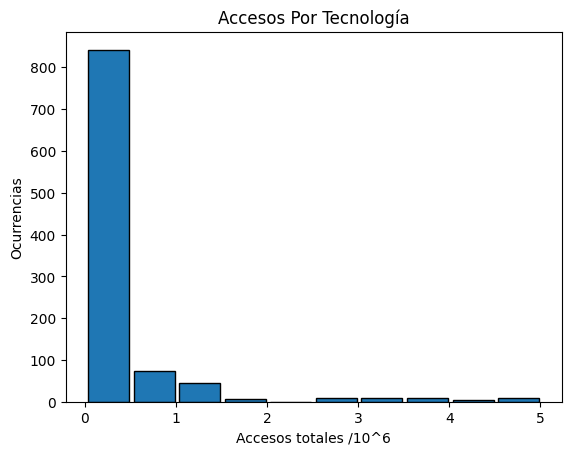

In [9]:
#Graficamos y observamos que la mayor ocurrencia de accesos se produce en el primer 
#rango de 1x10^6 y conforman una distribución fuertemente sesgada a la izquierda
plt.title('Accesos Por Tecnología')
plt.hist(x=df_int_accptech['Total']/10**6, edgecolor='black', linewidth=1, rwidth=0.9)
plt.xlabel('Accesos totales /10^6')
plt.ylabel('Ocurrencias')
plt.show()

In [10]:
#Debido al fuerte sesgo a la izquiera de la distribución el valor más representativo del conjunto de datos correspondería a la mediana
print(f' la mediana es {median(df_int_accptech['Total'])}')

 la mediana es 113915.0


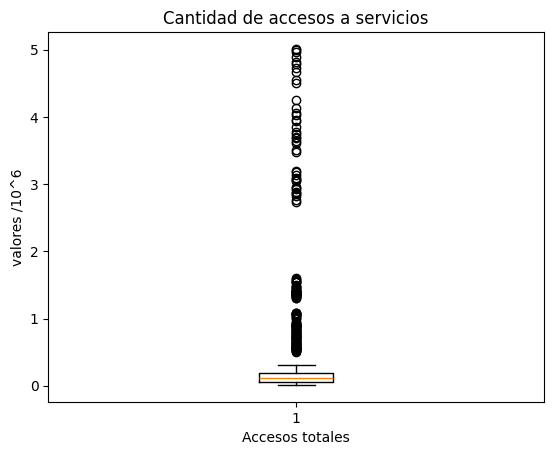

In [11]:
#El gráfico de cajas nos permite ver con más claridad la distribución de los datos
plt.boxplot(df_int_accptech['Total']/10**6)
plt.title('Cantidad de accesos a servicios')
plt.xlabel('Accesos totales')
plt.ylabel('valores /10^6')
plt.show()

**Disclaimer: Los siguientes datasets no continene valores nulos o duplicados y además las columnas tienen los formatos correctos**

In [12]:
df_int_penpob = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetración-poblacion')
print(f'Shape: {df_int_penpob.shape}\n')
print(f'{df_int_penpob.head(2)}')

Shape: (1000, 4)

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44


In [13]:
df_int_penpob['Accesos por cada 100 hab'].describe()

count    1000.000000
mean       15.727248
std         9.240063
min         2.723000
25%         9.018188
50%        13.674812
75%        20.323973
max        52.236739
Name: Accesos por cada 100 hab, dtype: float64

Graficamos y observamos que la mayor ocurrencia de accesos se produce en el primer rango de 1x10^6 y conforman una distribución fuertemente sesgada a la izquierda

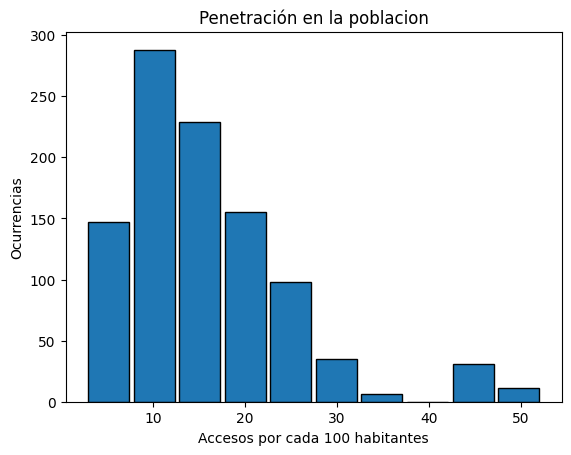

In [14]:
plt.title('Penetración en la poblacion')
plt.hist(x=df_int_penpob['Accesos por cada 100 hab'], edgecolor='black', linewidth=1, rwidth=0.9)
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Ocurrencias')
plt.show()

In [15]:
#Debido al sesgo a la izquiera de la distribución el valor más representativo del conjunto de datos correspondería a la mediana
print(f' la mediana es {median(df_int_penpob['Accesos por cada 100 hab'])}')

 la mediana es 13.6748115585677


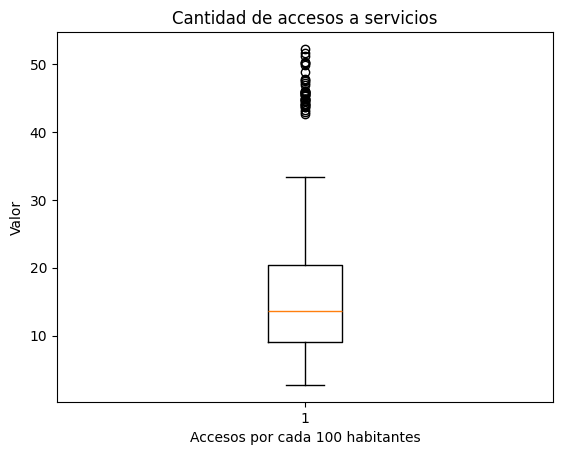

In [16]:
plt.boxplot(df_int_penpob['Accesos por cada 100 hab'])
plt.title('Cantidad de accesos a servicios')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Valor')
plt.show()

In [17]:
df_int_penhog = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetracion-hogares')
print(f'Shape: {df_int_penhog.shape}\n')
print(f'{df_int_penhog.head(2)}')

Shape: (1000, 4)

    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37


In [18]:
df_int_penhog['Accesos por cada 100 hogares'].describe()

count    1000.000000
mean       52.794973
std        24.135063
min         9.513970
25%        33.957657
50%        50.133004
75%        67.010861
max       124.061394
Name: Accesos por cada 100 hogares, dtype: float64

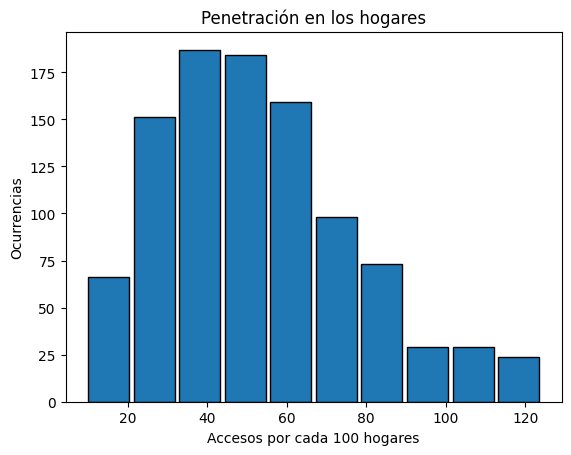

In [19]:
plt.title('Penetración en los hogares')
plt.hist(x=df_int_penhog['Accesos por cada 100 hogares'], edgecolor='black', linewidth=1, rwidth=0.9)
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Ocurrencias')
plt.show()

In [20]:
print(f' la mediana es {median(df_int_penhog['Accesos por cada 100 hogares'])}')

 la mediana es 50.13300393013305


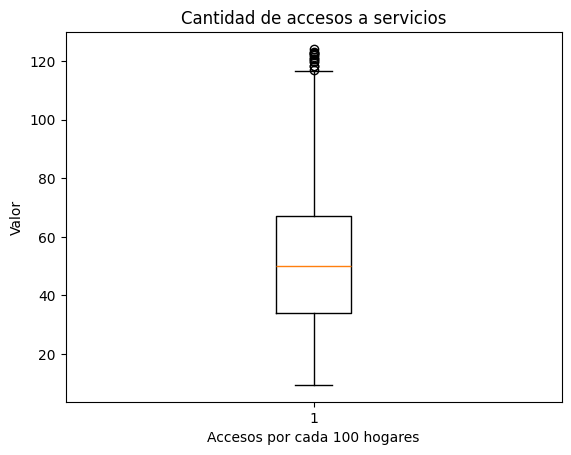

In [21]:
plt.boxplot(df_int_penhog['Accesos por cada 100 hogares'])
plt.title('Cantidad de accesos a servicios')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Valor')
plt.show()

In [22]:
df_int_velprov = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Velocidad % por prov')
print(f'Shape: {df_int_velprov.shape}\n')
print(f'{df_int_velprov.head(2)}')

Shape: (1008, 4)

    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01


In [23]:
df_int_velprov['Mbps (Media de bajada)'].describe()

count    1008.000000
mean       24.720245
std        33.660764
min         2.573729
25%         4.866698
50%        10.089315
75%        29.875292
max       234.440000
Name: Mbps (Media de bajada), dtype: float64

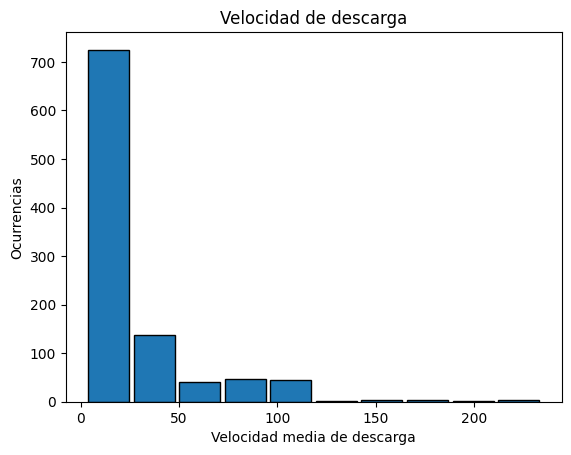

In [24]:
plt.title('Velocidad de descarga')
plt.hist(x=df_int_velprov['Mbps (Media de bajada)'], edgecolor='black', linewidth=1, rwidth=0.9)
plt.xlabel('Velocidad media de descarga')
plt.ylabel('Ocurrencias')
plt.show()

In [25]:
print(f' la mediana es {median(df_int_velprov['Mbps (Media de bajada)'])}')

 la mediana es 10.0893152724169


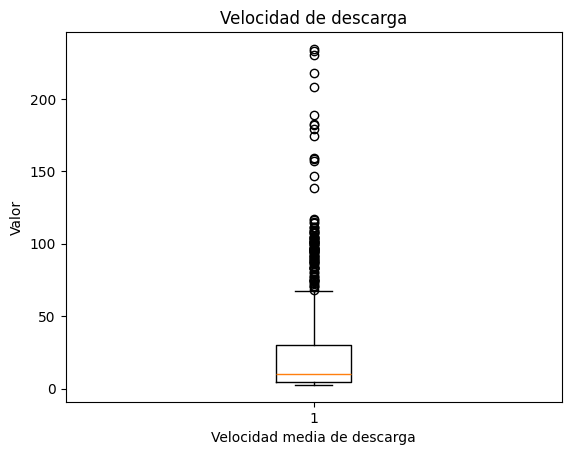

In [26]:
plt.boxplot(df_int_velprov['Mbps (Media de bajada)'])
plt.title('Velocidad de descarga')
plt.xlabel('Velocidad media de descarga')
plt.ylabel('Valor')
plt.show()

In [27]:
sheets_teffija = pd.ExcelFile('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_fija.xlsx').sheet_names
sheets_teffija

['Fija_prov_tipo',
 'Fija_accesos_tot',
 'Fija_penetracion_prov',
 'Fija_penetracion_tot',
 'Fija_ingresos']

In [28]:
df_teffija_penprov = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_fija.xlsx', sheet_name='Fija_penetracion_prov')
print(f'Shape: {df_teffija_penprov.shape}\n')
print(f'{df_teffija_penprov.head(2)}')

Shape: (1008, 5)

    Año  Trimestre        Provincia  Accesos telefonía fija por cada 100 hab  \
0  2014          1     Buenos Aires                                26.717541   
1  2014          1  Capital Federal                                52.663108   

   Accesos telefonía fija por cada 100 hogares  
0                                    85.264880  
1                                   128.570341  


In [29]:
df_teffija_penprov[['Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares']].describe()

,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
count,1008.000000,1008.000000
mean,13.608826,45.230426
std,9.236039,22.239948
min,3.588433,14.032975
25%,7.665753,29.258913
50%,10.679524,38.649369
75%,17.377891,56.580349
max,57.859352,138.277049


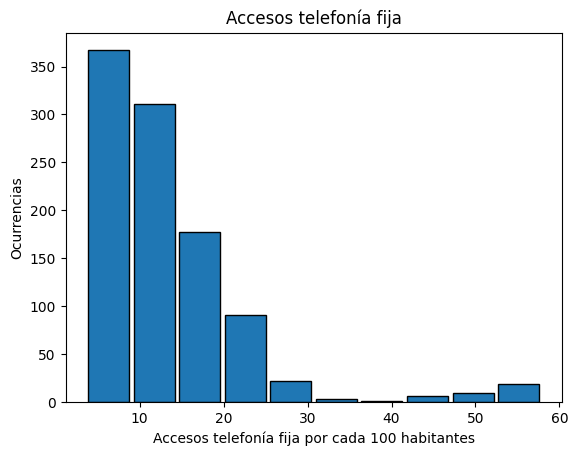

In [30]:
plt.title('Accesos telefonía fija')
plt.hist(x=df_teffija_penprov['Accesos telefonía fija por cada 100 hab'], edgecolor='black', linewidth=1, rwidth=0.9)
plt.xlabel('Accesos telefonía fija por cada 100 habitantes')
plt.ylabel('Ocurrencias')
plt.show()

In [31]:
print(f' la mediana es {median(df_teffija_penprov['Accesos telefonía fija por cada 100 hab'])}')

 la mediana es 10.679524091433802


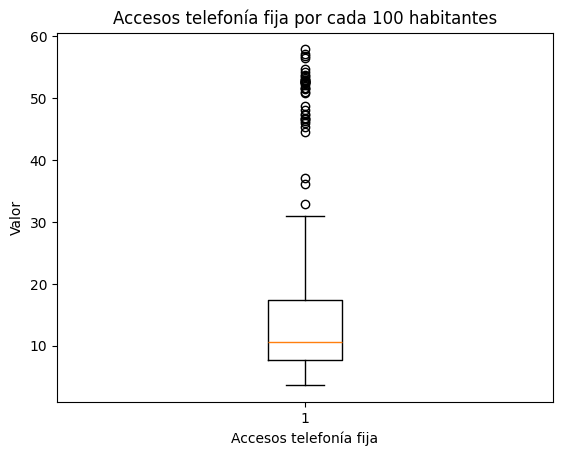

In [32]:
plt.boxplot(df_teffija_penprov['Accesos telefonía fija por cada 100 hab'])
plt.title('Accesos telefonía fija por cada 100 habitantes')
plt.xlabel('Accesos telefonía fija')
plt.ylabel('Valor')
plt.show()

In [33]:
sheets_tefmovil = pd.ExcelFile('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_movil.xlsx').sheet_names
sheets_tefmovil

['SMS',
 'Llamadas salientes',
 'Minutos salientes',
 'Ingresos',
 'Penetracion',
 'Accesos',
 'Hoja1']

In [34]:
df_tefmov_pentot = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_movil.xlsx', sheet_name='Penetracion')
print(f'Shape: {df_tefmov_pentot.shape}\n')
print(f'{df_tefmov_pentot.head(2)}')

Shape: (46, 4)

    Año  Trimestre  Accesos por cada 100 hab       Periodo
0  2013          1                    154.37  Ene-Mar 2013
1  2013          2                    156.00  Abr-Jun 2013


In [35]:
df_tefmov_pentot['Accesos por cada 100 hab'].describe()

count     46.000000
mean     135.901926
std       10.032485
min      120.180000
25%      128.492500
50%      133.838767
75%      142.722500
max      159.370000
Name: Accesos por cada 100 hab, dtype: float64

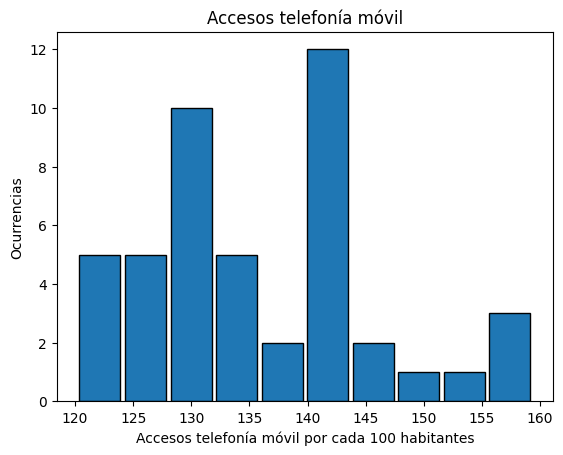

In [36]:
plt.title('Accesos telefonía móvil')
plt.hist(x=df_tefmov_pentot['Accesos por cada 100 hab'], edgecolor='black', linewidth=1, rwidth=0.9)
plt.xlabel('Accesos telefonía móvil por cada 100 habitantes')
plt.ylabel('Ocurrencias')
plt.show()

In [37]:
media = median(df_tefmov_pentot['Accesos por cada 100 hab'])
promedio = df_tefmov_pentot['Accesos por cada 100 hab'].mean()

print(f' la mediana es {media} y el promedio {promedio}') #La distribución es asimétrica

 la mediana es 133.83876716977502 y el promedio 135.90192646494353


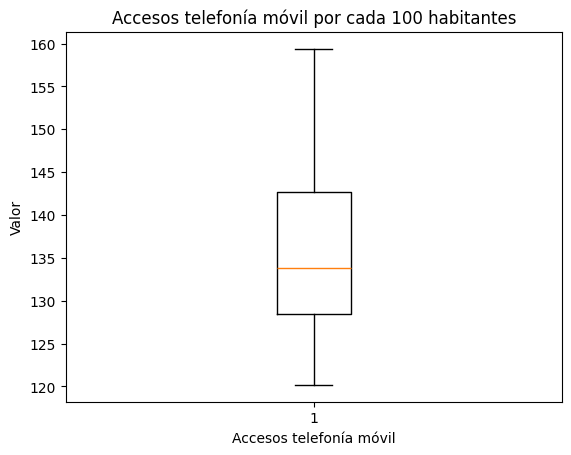

In [38]:
plt.boxplot(df_tefmov_pentot['Accesos por cada 100 hab'])
plt.title('Accesos telefonía móvil por cada 100 habitantes')
plt.xlabel('Accesos telefonía móvil')
plt.ylabel('Valor')
plt.show()

Combinación de datasets para el EDA

In [39]:
#Creamos el primer dataset unificado con datos de internet y telefonía fija que contienen las columnas 'Año', 'Provincia' y 'Trimestre'
# Primero, se une los primeros dos DataFrames
df_int_tfij = pd.merge(df_int_accptech, df_int_velprov, on=['Año', 'Provincia', 'Trimestre'], how='inner')
# Luego, unimos el resultado al tercero
df_int_tfij = pd.merge(df_int_tfij, df_int_penpob, on=['Año', 'Provincia', 'Trimestre'], how='inner')
# unimos el cuarto
df_int_tfij = pd.merge(df_int_tfij, df_int_penhog, on=['Año', 'Provincia', 'Trimestre'], how='inner')
# y por último quinto
df_int_tfij = pd.merge(df_int_tfij, df_teffija_penprov, on=['Año', 'Provincia', 'Trimestre'], how='inner')



In [40]:
#Creamos el segundo dataset con telefonía móvil y fija que contienen las columnas 'Año' y 'Trimestre'
df_teffija_pentot = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_fija.xlsx', sheet_name='Fija_penetracion_tot')
df_tmov_tfij = pd.merge(df_tefmov_pentot, df_teffija_pentot, on=['Año', 'Trimestre'], how='inner')

In [41]:
# cambiamos el nombre de las columnas para identificarlas de mejor manera
df_int_tfij.columns = ['Año', 'Trimestre', 'Provincia', 'Acceso por ADSL', 'Acceso por cablemodem', 'Acceso por fibra optica',
                    'Acceso por wireless', 'Acceso por otros', 'Total accesos por tecnologia', 'Mbps (Media de bajada)',
                    'Accesos internet por cada 100 hab', 'Accesos internet por cada 100 hogares', 'Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares']

df_tmov_tfij.columns = ['Año', 'Trimestre', 'Accesos telefonía movil por cada 100 hab', 'Periodo', 'Accesos telefonía fija por cada 100 hab',
                    'Accesos telefonía fija por cada 100 hogares']

In [42]:
# modificamos la posición de la columna periodo para que el dataset se vea un poco más estético
columna = df_tmov_tfij.pop('Periodo')
df_tmov_tfij.insert(2, 'Periodo', columna)

Preparamos el excel del mapa de conectividad para extraer la población y unirla al dataframe df_int_tfij con el fin de evaluar mejor las propuestas de crecimiento en base a la densidad poblacional

In [43]:
sheets_mapa = pd.ExcelFile('C:/Python/Data Science/Proyecto_2/Datasets/mapa_conectividad.xlsx').sheet_names
sheets_mapa

['Hoja3']

In [44]:
df_mapa = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/mapa_conectividad.xlsx', sheet_name='Hoja3')
print(f'{df_mapa.head(2)}')

      Provincia     Partido        Localidad  Población ADSL Cablemódem  \
0  BUENOS AIRES  25 de Mayo       25 de Mayo      23408   SI         SI   
1  BUENOS AIRES  25 de Mayo  Agustín Mosconi        280   --         --   

  Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  4G       Link  \
0      --           --        SI       SI             SI  SI  SI  6854100.0   
1      --           --        --       --             SI  --  --  6854010.0   

     Latitud   Longitud  
0 -35.433939 -60.173121  
1 -35.739217 -60.559063  


In [45]:
print(f'Dtype & Shape: \n{df_mapa.dtypes}{df_mapa.shape}\n')

Dtype & Shape: 
Provincia          object
Partido            object
Localidad          object
Población           int64
ADSL               object
Cablemódem         object
Dial Up            object
Fibra óptica       object
Satelital          object
Wireless           object
Telefonía Fija     object
3G                 object
4G                 object
Link              float64
Latitud           float64
Longitud          float64
dtype: object(4305, 16)



In [46]:
print(f'Duplicados:        {df_mapa.duplicated().sum()}\nNulos: \n{df_mapa.isnull().sum()}\n')

Duplicados:        0
Nulos: 
Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64



In [47]:
df_mapa.drop(columns='Link', inplace=True) #Elimino la columna que contiene nulos y no usaré para mi estudio
#Trato la columnas referentes a la disponibilidad del tipo de servicio
columnas = ['ADSL', 'Cablemódem','Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G'] #Determino las columnas a analizar
unicos = df_mapa[columnas].apply(lambda col: col.unique())   #Reviso lo valores únicos
print(unicos)

  ADSL Cablemódem Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  \
0   SI         SI      --           --        SI       SI             SI  SI   
1   --         --      SI           SI        --       --             --  --   

   4G  
0  SI  
1  --  


In [48]:
# Diccionario de reemplazo
reemplazo = {
                '--': 0,
                'SI': 1,
                            }

# Columnas seleccionadas
columnas = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G' ]

# Aplicar mapeo sin usar replace()
df_mapa[columnas] = df_mapa[columnas].map(lambda x: reemplazo.get(x, x))  # Si no está en el diccionario, deja el valor original.


In [49]:
df_mapa.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,1,1,0,0,1,1,1,1,1,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,0,0,0,0,0,0,1,0,0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,1,0,0,0,1,0,0,1,0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,1,0,0,0,0,0,1,0,0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,0,0,0,0,0,1,0,0,0,-35.164397,-60.081358


In [50]:
#Eliminamos las filas donde la población es igual o menor a 10.000 habitantes porque no es de nuestro interés. así enfocamos el negocio en pobabliones
#con un mayor potencial de crecimiento
df_mapa = df_mapa.loc[df_mapa['Población'] >= 10000]

In [51]:
df_int_tfij.to_excel('C:/Python/Data Science/Proyecto_2/Datasets/int_tfij.xlsx', index=False)
df_tmov_tfij.to_excel('C:/Python/Data Science/Proyecto_2/Datasets/tmov_tfij.xlsx', index=False)
df_mapa.to_excel('C:/Python/Data Science/Proyecto_2/Datasets/mapa.xlsx', index=False)

## CALCULOS DE KPIs

KPI propuesto es aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:

KPI=((Nuevo acceso−Acceso actual)/Acceso actual)∗100

Donde:

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.
Esta fórmula te ayudará a calcular el KPI para medir el aumento en el acceso a Internet por cada 100 hogares en cada provincia.

In [52]:
df_int_penhog = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetracion-hogares')

In [53]:
# Crear un nuevo DataFrame para los cálculos, asegurando que es una copia
df_KPIs_crec = df_int_penhog[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']]
df_KPIs_crec.rename(columns={'Accesos por cada 100 hogares': 'Accesos internet por cada 100 hogares'}, inplace=True)

# Ordenar por las columnas clave para facilitar el cálculo
df_KPIs_crec.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False], inplace=True)

# Calcular la variación por cada provincia
df_KPIs_crec['Incremento'] = df_KPIs_crec.groupby('Provincia')['Accesos internet por cada 100 hogares'].diff(-1)

# calcular la variación porcentual para establecer el KPI
df_KPIs_crec['KPI CH'] = df_KPIs_crec['Incremento'] / df_KPIs_crec['Accesos internet por cada 100 hogares'].shift(-1) #* 100

df_KPIs_crec.drop(columns=['Accesos internet por cada 100 hogares', 'Incremento'], inplace=True) #Elimino las columnas que no se seguirán usando

df_KPIs_crec.head()

,Año,Trimestre,Provincia,KPI CH
0,2024,2,Buenos Aires,-0.015536
24,2024,1,Buenos Aires,0.001729
48,2023,4,Buenos Aires,0.003968
72,2023,3,Buenos Aires,0.012175
96,2023,2,Buenos Aires,0.008481


KPI GT (Grade up technology) medirá el crecimiento de accesos por tecnologías modernas vs el total de accesos

GT = (accesos cablemodem + accesos fibra óptica) / total de accesos

KPI GT = (GT periodo actual - GT periodo nuevo)/periodo actual * 100

El KPI propuesto será de 3%, vale decir que se espera como meta que los accesos más rápidos a internet crezcan en razón del 3%

In [54]:
df_KPIs_GT = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Accesos Por Tecnología')
df_KPIs_GT['Cablemodem_Fibraoptica'] = df_KPIs_GT['Cablemodem'] + df_KPIs_GT['Fibra óptica']
df_KPIs_GT.drop(columns=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], inplace=True)

In [55]:
#Quitamos los asteriscos para normalizar el dataframe
df_KPIs_GT.dropna(inplace=True)
df_KPIs_GT['Año'] = df_KPIs_GT['Año'].astype(str).str.replace(' *', '').astype(int)
df_KPIs_GT['Trimestre'] = df_KPIs_GT['Trimestre'].astype(str).str.replace(' *', '').astype(int) 

In [56]:
df_KPIs_GT['GT'] = df_KPIs_GT['Cablemodem_Fibraoptica']/df_KPIs_GT['Total'] #Creo la columna GT para el cálculo final del KPI 
                                                                            #que divide la suma de accesos cable modem y fibra optica 
                                                                            #y la divide por el total
df_KPIs_GT.drop(columns=['Total', 'Cablemodem_Fibraoptica'], inplace=True) #Elimino las columnas que no se seguirán usando

In [57]:
valor = df_KPIs_GT.loc[(df_KPIs_GT['Provincia'] == 'Buenos Aires') & 
                        (df_KPIs_GT['Año'] == 2023) & 
                        (df_KPIs_GT['Trimestre'] == 4), 'GT'].values[0]

df_KPIs_GT.loc[1] =  [2024, 1, 'Buenos Aires', valor] #Agrego el valor que falta del primer trimestre de 2024 para Buenos Aires

In [58]:
# Ordenar por las columnas clave para facilitar el cálculo
df_KPIs_GT.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False], inplace=True)

# Calcular la variación por cada provincia
df_KPIs_GT['Incremento'] = df_KPIs_GT.groupby('Provincia')['GT'].diff(-1)

# calcular la variación porcentual para establecer el KPI
df_KPIs_GT['KPI GT'] = df_KPIs_GT['Incremento'] / df_KPIs_GT['GT'].shift(-1) #* 100

In [59]:
df_KPIs_GT.drop(columns=['GT', 'Incremento'], inplace=True) #Elimino las columnas que no se seguirán usando
df_KPIs_GT.head()

,Año,Trimestre,Provincia,KPI GT
0,2024,2,Buenos Aires,0.002188
1,2024,1,Buenos Aires,0.000000
47,2023,4,Buenos Aires,0.004025
71,2023,3,Buenos Aires,0.008306
95,2023,2,Buenos Aires,0.009736


KPI IV (Incremento en velocidad media) medirá el aumento de la velocidad de internet por provincia

Incremento de velocidad = Mbps (media de bajada) periodo actual - Mbps (media de bajada) anterior

IV = (Mbps (media de bajada) periodo actual - Mbps (media de bajada) anterior) / Mbps (media de bajada) anterior

KPI IV = (IV periodo actual - IV periodo nuevo)/periodo actual * 100

El KPI propuesto será de 3%, vale decir que se espera como meta que la velocidad a internet crezcan en razón del 3%

In [60]:
df_KPIs_IVM = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Velocidad % por prov')

# Ordenar por las columnas clave para facilitar el cálculo
df_KPIs_IVM.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False], inplace=True)

# Calcular la variación por cada provincia
df_KPIs_IVM['Variacion'] = df_KPIs_IVM.groupby('Provincia')['Mbps (Media de bajada)'].diff(-1)

# calcular la variación porcentual para establecer el KPI
df_KPIs_IVM['KPI IVM'] = df_KPIs_IVM['Variacion'] / df_KPIs_IVM['Mbps (Media de bajada)'].shift(-1) #* 100

df_KPIs_IVM.drop(columns=['Mbps (Media de bajada)', 'Variacion'], inplace=True) #Elimino las columnas que no se seguirán usando


In [61]:
df_KPIs_IVM.head()

,Año,Trimestre,Provincia,KPI IVM
0,2024,2,Buenos Aires,-0.010809
24,2024,1,Buenos Aires,0.004038
48,2023,4,Buenos Aires,0.079338
72,2023,3,Buenos Aires,0.061366
96,2023,2,Buenos Aires,0.190825


In [62]:
#Combinamos los dataframes a través de las columnas 'Año', 'Provincia' y 'Trimestre'
# Primero, se une los primeros dos DataFrames
df_KPIs = pd.merge(df_KPIs_crec, df_KPIs_GT, on=['Año', 'Provincia', 'Trimestre'], how='inner')
# Luego, unimos el resultado al tercero
df_KPIs = pd.merge(df_KPIs, df_KPIs_IVM, on=['Año', 'Provincia', 'Trimestre'], how='inner')

df_KPIs.dropna(inplace=True) #Elimino los valores nulos producto del cálculo de los kpi

df_KPIs.head()


,Año,Trimestre,Provincia,KPI CH,KPI GT,KPI IVM
0,2024,2,Buenos Aires,-0.015536,0.002188,-0.010809
1,2024,1,Buenos Aires,0.001729,0.000000,0.004038
2,2023,4,Buenos Aires,0.003968,0.004025,0.079338
3,2023,3,Buenos Aires,0.012175,0.008306,0.061366
4,2023,2,Buenos Aires,0.008481,0.009736,0.190825


In [64]:
df_KPIs.to_excel('C:/Python/Data Science/Proyecto_2/Datasets/KPIs.xlsx', index=False)